In [20]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

(600, 500, 3)


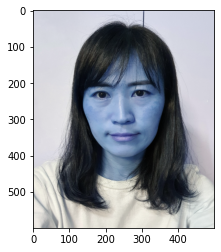

In [21]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/myface.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (500, 600))
print(img_bgr.shape) # 이미지 사이즈 확인
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show() # 아바타같다 



In [22]:
cv2.waitKey(0) #keyboard입력을 대기하는 함수 0이면 key입력까지 무한대기

-1

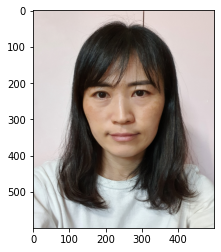

In [23]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [24]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [25]:
dlib_rects = detector_hog(img_rgb, 1)
type(dlib_rects)

_dlib_pybind11.rectangles

In [26]:
print(dlib_rects)

rectangles[[(142, 167) (365, 390)]]


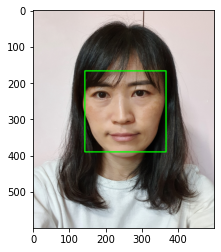

In [27]:
for dlib_rect in dlib_rects : 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [28]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("hi")

hi


In [29]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


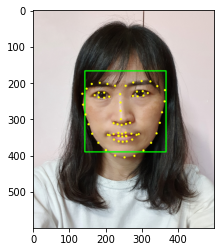

In [30]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [31]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    print(landmark[33])  #코 끝을 기준으로 잡았다. 
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print("(x, y) : ({}, {})".format(x, y))
    print("(w, h) : ({}, {})".format(w, h))

(243, 316)
(x, y) : (241, 300)
(w, h) : (224, 224)


In [32]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)



(224, 224, 3)


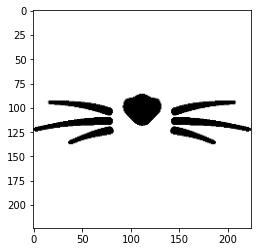

In [33]:
plt.imshow(img_sticker)

In [34]:
refined_x = x - int(w/2) 
refined_y = y - int(h/2)
print("(x, y) : ({}, {})".format(refined_x, refined_y))

(x, y) : (129, 188)


In [35]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)
print(img_sticker.shape)

(224, 224, 3)
(224, 224, 3)


In [36]:
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
      np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

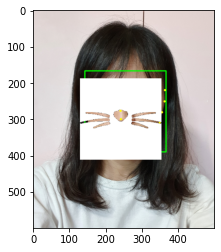

In [37]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

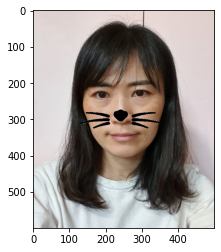

In [38]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255 , sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

회고: openCV와 dlib를 처음 다뤄보아서 너무 어려웠다. 
    노드에 나온 코드를 최대한 참고하여 스티커 위치를 여러 시도끝에 찾아서 다행히 위치는 찾을 수 있었다.
    얼굴이 회전하게 되면 각도까지 고려해야 하고 사진이 멀리 찍히면 얼굴 랜드마크 잡기가 어려워 질 것 같은 생각은 들지만 이번은 생각만 할 뿐.
    코드로 구현하는 것은 아직 역부족인 것 같다. ㅠ
